In [2]:
import numpy as np

In [3]:
import pandas as pd

# generate some dummy data
df = pd.DataFrame({
    'weight': np.random.normal(70,15,size=100),
    'height': np.random.normal(1.6,0.3,size=100),
    'iq': np.random.uniform(80,180, size=100),
    'distance': np.abs(np.random.normal(size=100)),
    'undergrad': np.random.normal(70,4, size=100)
})

print(df)

       weight    height          iq  distance  undergrad
0   67.505398  1.676766  176.840001  1.117545  63.519884
1   99.477037  1.521717  152.331408  0.337473  74.619319
2   88.171162  1.088704  129.640933  1.356487  64.719803
3   61.913029  1.781218  117.841035  1.064279  69.787122
4   56.295496  1.718764  157.945543  0.878690  71.831808
..        ...       ...         ...       ...        ...
95  83.839462  1.855320   92.439205  1.329701  69.533895
96  61.556149  1.663392  109.338141  1.122179  68.835902
97  73.436603  1.382001  110.269522  0.221131  70.278593
98  56.660909  1.514391  150.690149  0.625954  66.234689
99  76.727428  1.439022  151.138294  0.579965  69.802015

[100 rows x 5 columns]


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# generate some data and store in dataframe
Ns = 5000
s_mu = [1,1]
s_cov = [[4,1],[1,4]]

Nb = 5000
b_mu = [-1,-1]
b_cov = [[4,-1],[-1,4]]

sx, sy = np.random.multivariate_normal(s_mu, s_cov, size=Ns).T
bx, by = np.random.multivariate_normal(b_mu, b_cov, size=Nb).T

df = pd.DataFrame({
    'x': np.concatenate((sx,bx)),
    'y': np.concatenate((sy,by)),
    'C': ['signal']*Ns + ['background']*Nb
})

In [5]:
print(df)

             x         y           C
0     0.548895  2.391687      signal
1     0.043823  2.531100      signal
2    -4.003212 -1.140975      signal
3     1.737680  2.817326      signal
4     2.102036  1.733141      signal
...        ...       ...         ...
9995 -1.606265 -1.279477  background
9996 -3.163200 -0.889766  background
9997  1.689526 -3.819665  background
9998  0.777794 -4.393046  background
9999 -0.458640 -3.085480  background

[10000 rows x 3 columns]


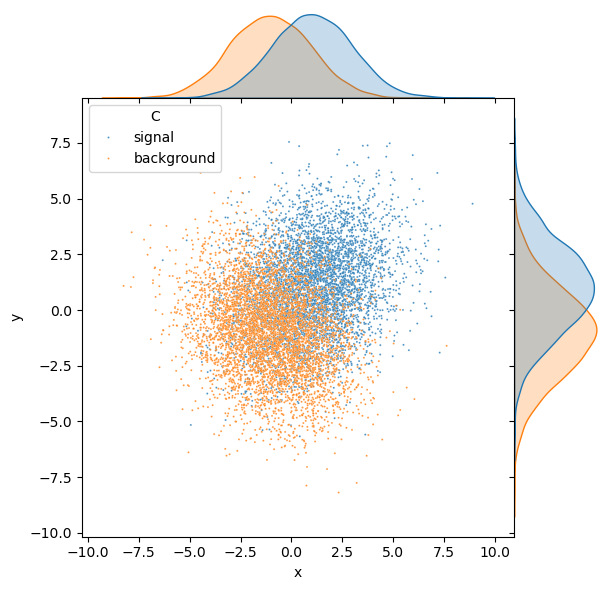

In [6]:
import seaborn as sns
_ = sns.jointplot( df, x='x', y='y', hue='C', s=2, alpha=0.8, space=0)

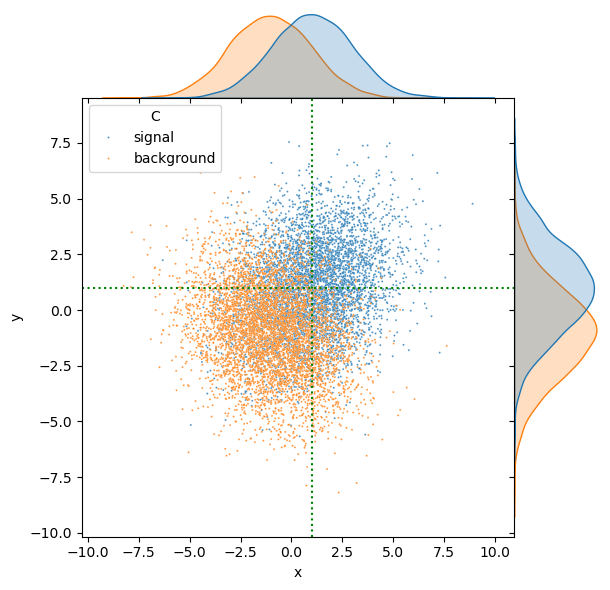

In [7]:
# picking some cut values by eye
splot = sns.jointplot( df, x='x', y='y', hue='C', s=2, alpha=0.8, space=0)
_ = splot.ax_joint.axvline(1,c='g',ls=':')
_ = splot.ax_joint.axhline(1,c='g',ls=':')


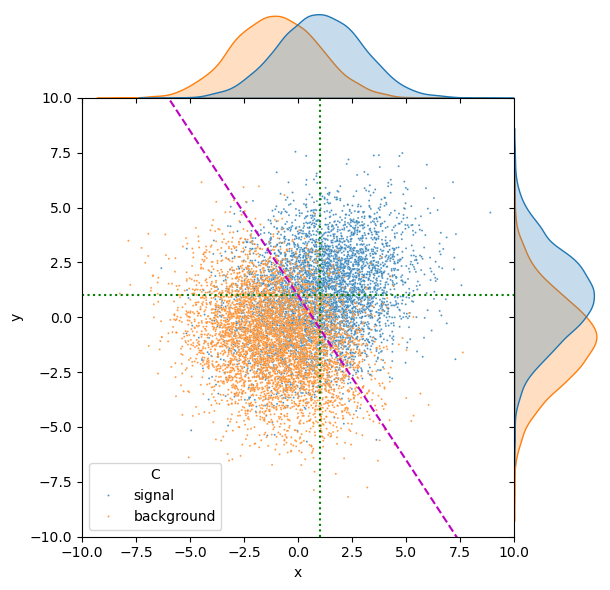

In [8]:
# picking a more sophisticated diagonal cut
splot = sns.jointplot( df, x='x', y='y', hue='C', s=2, alpha=0.8, space=0)
_ = splot.ax_joint.axvline(1,c='g',ls=':')
_ = splot.ax_joint.axhline(1,c='g',ls=':')
x = np.linspace(-10,10)
y = -1.5*x + 1
_ = splot.ax_joint.plot(x,y, c='m', ls='--')
_ = splot.ax_joint.set_xlim(-10,10)
_ = splot.ax_joint.set_ylim(-10,10)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
df['P'] = 0
df.loc[df['C']=='signal', 'P'] = 1
print(df)

             x         y           C  P
0     0.548895  2.391687      signal  1
1     0.043823  2.531100      signal  1
2    -4.003212 -1.140975      signal  1
3     1.737680  2.817326      signal  1
4     2.102036  1.733141      signal  1
...        ...       ...         ... ..
9995 -1.606265 -1.279477  background  0
9996 -3.163200 -0.889766  background  0
9997  1.689526 -3.819665  background  0
9998  0.777794 -4.393046  background  0
9999 -0.458640 -3.085480  background  0

[10000 rows x 4 columns]


In [10]:
X = df[['x','y']].to_numpy()
y = df['P'].to_numpy()
print(X.shape)
print(X)
print(y.shape)
print(y)

(10000, 2)
[[ 0.5488945   2.39168689]
 [ 0.04382292  2.53109972]
 [-4.00321224 -1.14097547]
 ...
 [ 1.68952556 -3.81966522]
 [ 0.77779389 -4.39304607]
 [-0.45864031 -3.08547982]]
(10000,)
[1 1 1 ... 0 0 0]


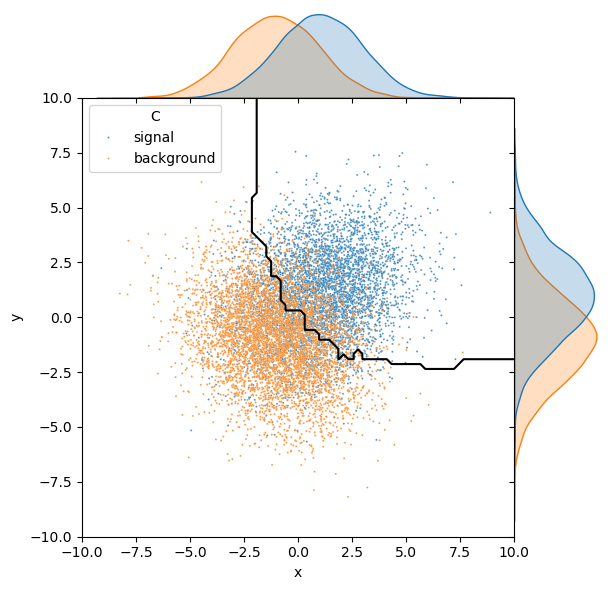

In [11]:
# create random forest and train it
clf = RandomForestClassifier(n_estimators=500, max_depth=5)
clf.fit(X, y)

# draw the decision boundary
splot = sns.jointplot( df, x='x', y='y', hue='C', s=2, alpha=0.8, space=0)
splot.ax_joint.set_xlim(-10,10)
splot.ax_joint.set_ylim(-10,10)

nx, ny = np.meshgrid( np.linspace(-10,10,100), np.linspace(-10,10,100) )
NX = np.vstack( [nx.ravel(), ny.ravel()] ).T
disp = DecisionBoundaryDisplay.from_estimator( clf, NX, response_method="predict", 
                                               plot_method="contour", levels=[0.9], zorder=100,
                                               colors='k', ax=splot.ax_joint)

In [12]:
## To demonstrate criteria and metrics will train a BDT classifier
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.05)
clf.fit(X,y)

df['T'] = clf.predict(X)
pred_prob = clf.predict_proba(X)
df[['Pb','Ps']] = pred_prob
print(df)  

             x         y           C  P  T        Pb        Ps
0     0.548895  2.391687      signal  1  1  0.115872  0.884128
1     0.043823  2.531100      signal  1  1  0.193431  0.806569
2    -4.003212 -1.140975      signal  1  0  0.854962  0.145038
3     1.737680  2.817326      signal  1  1  0.041504  0.958496
4     2.102036  1.733141      signal  1  1  0.052747  0.947253
...        ...       ...         ... .. ..       ...       ...
9995 -1.606265 -1.279477  background  0  0  0.755343  0.244657
9996 -3.163200 -0.889766  background  0  0  0.854962  0.145038
9997  1.689526 -3.819665  background  0  0  0.933100  0.066900
9998  0.777794 -4.393046  background  0  0  0.947247  0.052753
9999 -0.458640 -3.085480  background  0  0  0.815119  0.184881

[10000 rows x 7 columns]


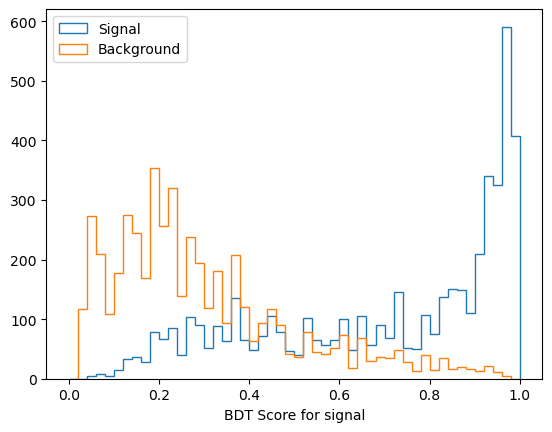

In [13]:
plt.hist( df[df['P']==1]['Ps'], bins=50, range=(0,1), histtype='step', label='Signal')
plt.hist( df[df['P']==0]['Ps'], bins=50, range=(0,1), histtype='step', label='Background')
plt.xlabel('BDT Score for signal')
plt.legend()

## Performance criteria and metrics
<font color="red">*In order to evaluate performance you always need a reference sample which contains the true (target) values as well as the algorithm prediction*</font>
    
- **<font color="blue">True postitive (TP)</font>**: correct prediction of positive outcome
- **<font color="blue">False positive (FP)</font>**: incorrect prediction of positive outcome
- **<font color="blue">True negative (TN)</font>**: correct prediction of negative outcome
- **<font color="blue">False negative (FN)</font>**: incorrect prediction of negative outcome

- All postive outcomes:
$$ P = TP + FN $$

- All negative outcomes:
$$ N = TN + FP $$

- Events classified as positive:
$$ C_P = TP + FP $$

- Events classified as negative:
$$ C_N = TN + FN $$


In [14]:
# In our example

P  = (df['P'].values).sum()
N  = (df['P'].values==0).sum()
Cp = (df['T'].values).sum()
Cn = (df['T'].values==0).sum()

TP = (df[ df['T']==1 ]['P'].values).sum()
FP = (df[ df['T']==1 ]['P'].values==0).sum()
TN = (df[ df['T']==0 ]['P'].values==0).sum()
FN = (df[ df['T']==0 ]['P'].values).sum()


print('P: ', P)
print('N: ', N)
print('Cp:', Cp)
print('Cn:', Cn)

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

## An important lesson : PUT assert statements in your code!
assert( P == (TP+FN) )
assert( N == (TN+FP) )
assert( Cp == (TP+FP) )
assert( Cn == (TN+FN) )  

P:  5000
N:  5000
Cp: 4443
Cn: 5557
TP: 3650
FP: 793
TN: 4207
FN: 1350


### *Performance criteria*

- **Recall: True positive rate**, *signal efficiency*, *sensitivity*
    $$ s = TPR = \frac{TP}{TP + FN} $$
- **Specificity: True negative rate**, *background efficiency*
    $$ s' = TNR = \frac{TN}{TN + FP} $$
- **False positive rate** *1-specificity*
    $$ FPR = \frac{FP}{FP+TN} = 1 - TNR $$
- **False negative rate** *1-sensitivity*
    $$ FNR = \frac{FN}{FN+TP} = 1 - TPR $$
    
- A <font color="blue">high FPR</font> is indicative of a so-called <font color="blue">"Type-I" error</font>
- A <font color="blue">high FNR</font> is indicative of a so-called <font color="blue">"Type-II" error</font>
- *<font color="green">We will discuss this more when we do **Hypothesis Testing**</font>*
- Generally considered more desirable to lower the FPR at the risk of a high FNR (think Covid tests, fake discoveries etc.)

In [15]:
# In our example
TPR = TP / ( TP+FN )
TNR = TN / ( TN+FP )
FPR = FP / ( FP+TN )
FNR = FN / ( FN+TP )

print('TPR:', TPR)
print('TNR:', TNR)
print('FPR:', FPR)
print('FNR:', FNR)

assert( abs(FPR - (1-TNR))<0.001 )
assert( abs(FNR - (1-TPR))<0.001 )

TPR: 0.73
TNR: 0.8414
FPR: 0.1586
FNR: 0.27


### *Performance criteria*

- **Precision** or **purity**, fraction of positive outcomes correctly classified
    $$ p = \frac{TP}{FP+TP} $$
- **Accuracy**, fraction of all events correctly classified
    $$ \alpha = \frac{TP+TN}{TP+TN+FP+FN} $$
- **Error rate**, fraction of events incorrectly classified
    $$ \varepsilon = \frac{FP+FN}{TP+TN+FP+FN} = 1-\alpha $$
- **Significance**
    $$ \sigma = \frac{TP}{\sqrt{TP+FP}} $$
- **F-score**
    $$ F = 2 \frac{p s}{p + s} = \frac{2 \;TPR}{ 2\; TPR + FPR + FNR} $$

In [16]:
# In our example
p = TP / (FP+TP)
a = (TP+TN) / (TP+TN+FP+FN)
e = (FP+FN) / (TP+TN+FP+FN)
s = TP / (TP+FP)**0.5
F = (2*TPR) / (2*TPR + FPR + FNR)

print('p: ', p)
print('a: ', a)
print('e: ', e)
print('s: ', s)
print('F: ', F)
 
assert( abs(e - (1-a)) < 0.001 )

p:  0.8215169930227324
a:  0.7857
e:  0.2143
s:  54.75889904420078
F:  0.7730594090860955


## Receiver Operating Characteristic (ROC)

- Plot of FPR = 1 - specificity *vs* TPR = sensitivity
- Better performance has line nearer top-left
- Area under ROC (AUC) is a good metric for performance

<table>
    <tr>
        <td> <img src="plots/roc1.png" alt="drawing"/> </td>
        <td> <img src="plots/roc2.png" alt="drawing"/> </td>
    </tr>
</table>   

0.8709832399999999


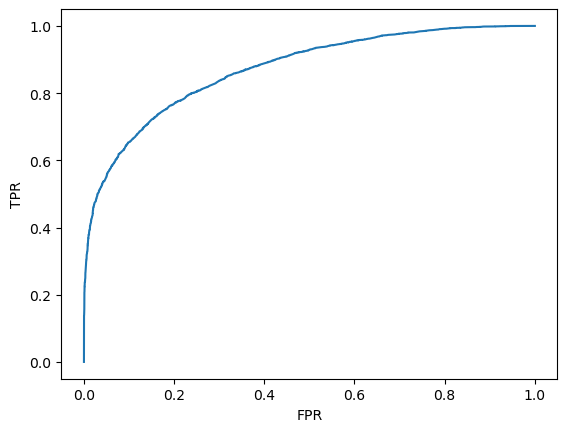

In [17]:
## In our example
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve( df['P'], df['Ps'])
plt.plot( fpr, tpr )
plt.xlabel('FPR')
plt.ylabel('TPR') 
auc = roc_auc_score( df['P'], df['Ps'])
print(auc)

In [18]:
# make a dummy dataset using scikit-learn and inspect it

import pandas as pd
from sklearn.datasets import make_classification

X, y = make_classification( n_samples=5000, n_features=5, n_informative=4, n_redundant=0)

df = pd.DataFrame( data=X,
                   columns=[ f'Feature {i}' for i in range(5)])
df['target'] = y
 
print(df)

      Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  target
0     -0.121086  -0.776517  -3.346330   4.004413   2.072092       1
1     -0.992255   0.177295  -1.809011   1.723790  -0.105056       0
2      0.700817  -0.503143  -1.522997   2.472262   1.242475       1
3     -1.238747   1.258120  -1.026233  -0.951963  -1.489711       1
4      1.708631   1.614505   2.116232   2.817920   1.714144       0
...         ...        ...        ...        ...        ...     ...
4995  -0.350409   0.630768  -1.687611  -0.768104  -1.170849       1
4996   2.803590   0.331013  -1.776714   1.595812   0.285071       1
4997  -0.994925   0.443209  -1.311722   2.408374  -1.063919       0
4998  -0.882832   0.222780  -0.883156  -0.281190  -0.825356       1
4999  -0.542380   0.989796  -0.779873  -0.241249  -0.803518       1

[5000 rows x 6 columns]


In [19]:
import matplotlib as mpl
mpl.rcParams['figure.autolayout'] = False
mpl.rcParams['xtick.top'] = False
mpl.rcParams['ytick.right'] = False

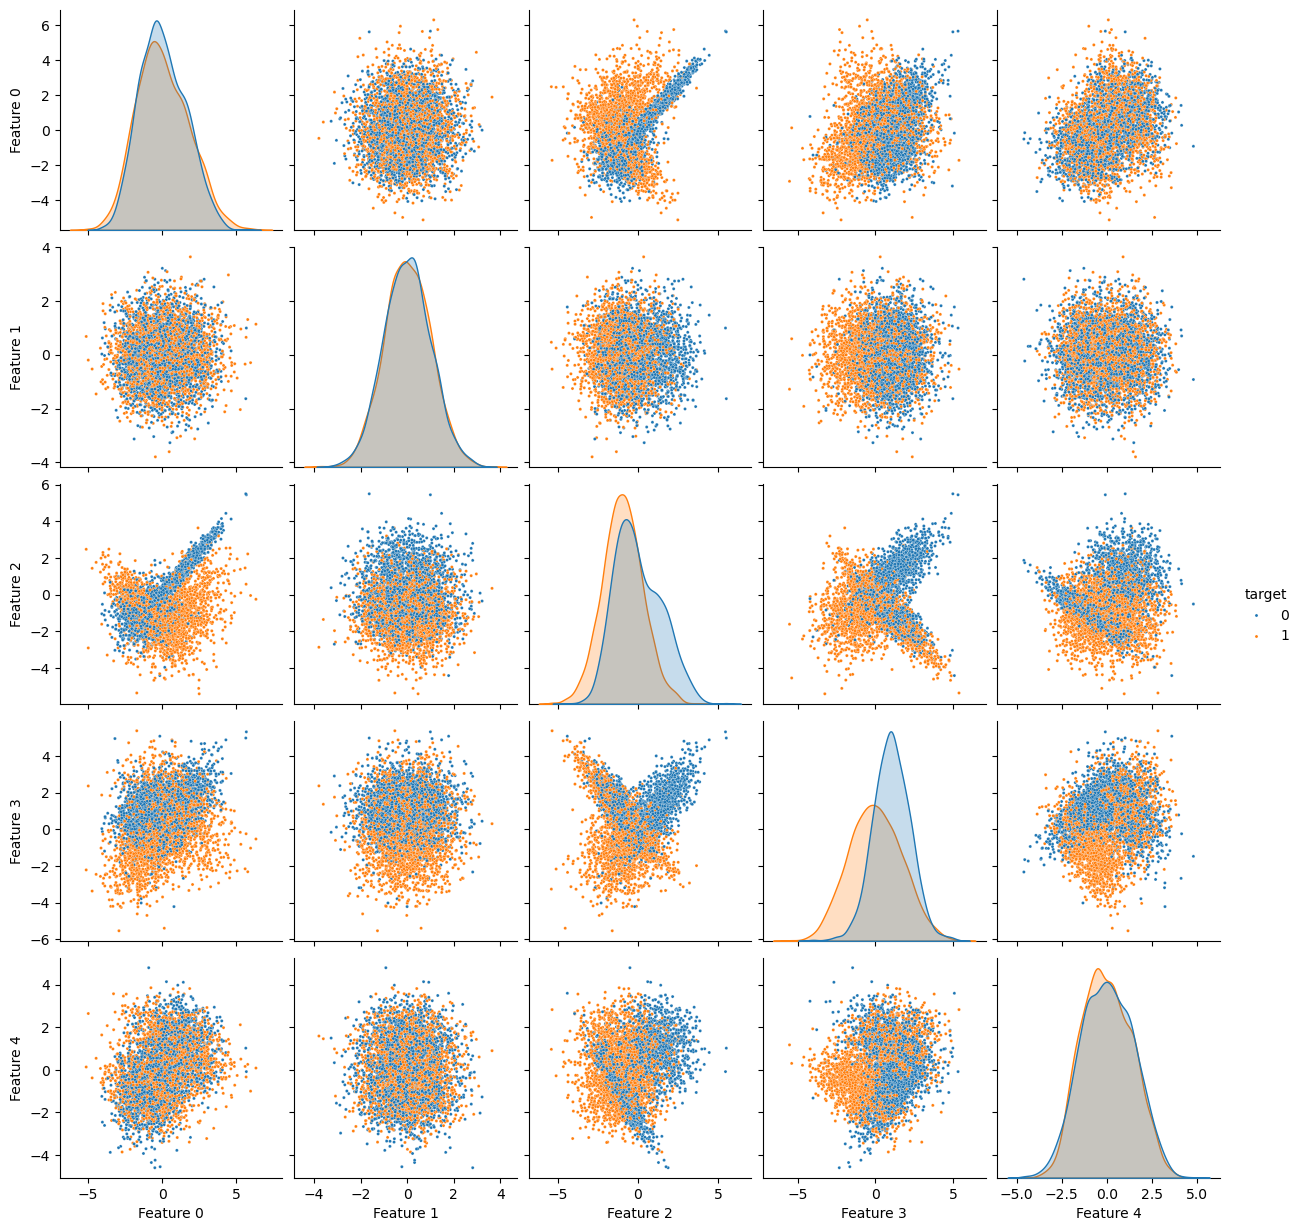

In [20]:
# make some plots of it
import seaborn as sns
g = sns.pairplot(df, hue='target', plot_kws=dict(s=5))

In [21]:
# split the data up into training, validation and test samples
from sklearn.model_selection import train_test_split

X = df[df.columns[:-1]].to_numpy()
y = df['target'].to_numpy()

# get 50% training sample
X_train, X_temp, y_train, y_temp = train_test_split( X, y, test_size=0.5) 

# split remaining 50% of temp into 25% val and 25% test
X_val, X_test, y_val, y_test = train_test_split( X_temp, y_temp, test_size=0.5)

print(X_train.shape, X_test.shape, X_val.shape)

(2500, 5) (1250, 5) (1250, 5)


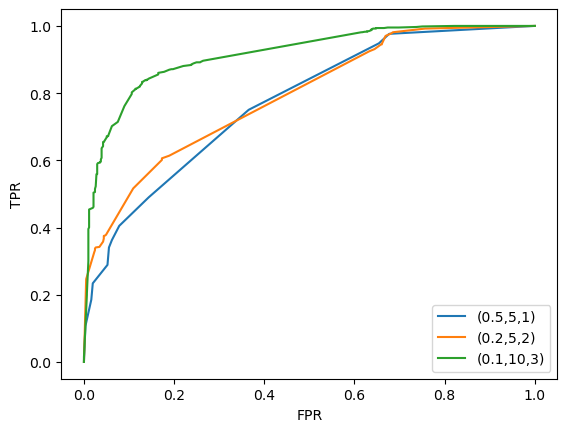

In [22]:
## now perform the training using a simple gradient boosted decision tree
## and plot the ROC curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


# a few different hyperparameter choices
hyperpar_opts = [
    {'learning_rate': 0.5, 'n_estimators': 5 , 'max_depth': 1 },
    {'learning_rate': 0.2, 'n_estimators': 5 , 'max_depth': 2 },
    {'learning_rate': 0.1, 'n_estimators': 10, 'max_depth': 3 },
]

models = []
for hpars in hyperpar_opts:
    clf = GradientBoostingClassifier( **hpars )
    clf.fit(X_train, y_train)
    # this [:,1] is because `predict_proba` returns the probability for each class
    y_val_pred = clf.predict_proba(X_val)[:,1]
    fpr, tpr, _ = roc_curve( y_val, y_val_pred )
    label = '(' + ','.join([f'{p}' for p in hpars.values()]) + ')'
    plt.plot(fpr, tpr, label=label)
    models.append( clf )

plt.xlabel('FPR')
plt.ylabel('TPR')
_ = plt.legend()


In [23]:
## see the most optimal we found was the last one so use that one for actual evaluation
best_clf = models[-1]

y_train_pred = best_clf.predict_proba( X_train )[:,1] # returns as prob for each class
y_test_pred  = best_clf.predict_proba( X_test )[:,1]
y_val_pred   = best_clf.predict_proba( X_val )[:,1]

In [24]:
## Compare training and testing scores
from sklearn.metrics import roc_auc_score

auc_train = roc_auc_score( y_train, y_train_pred )
auc_test  = roc_auc_score( y_test, y_test_pred )
auc_val   = roc_auc_score( y_val, y_val_pred )

print('Train:', auc_train)
print('Test: ', auc_test)
print('Val:  ', auc_val)

Train: 0.9195693900599516
Test:  0.8992012415456834
Val:   0.9143287381460301


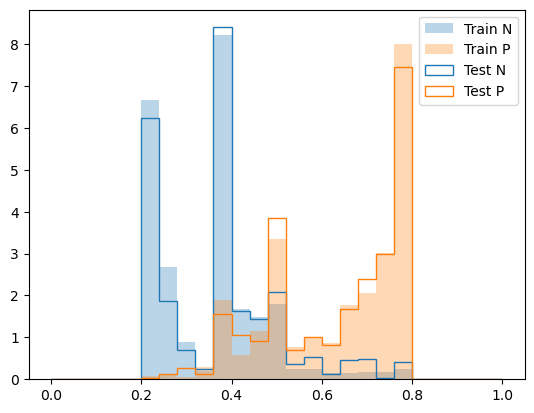

In [25]:
# Maybe we are a bit over-trainined?
# doesn't look too bad

plt.hist( y_train_pred[y_train==0], range=(0,1), bins=25, alpha=0.3, density=True, label='Train N' )
plt.hist( y_train_pred[y_train==1], range=(0,1), bins=25, alpha=0.3, density=True, label='Train P' )

plt.hist( y_test_pred[y_test==0], range=(0,1), bins=25, ec='C0', histtype='step', density=True, label='Test N')
plt.hist( y_test_pred[y_test==1], range=(0,1), bins=25, ec='C1', histtype='step', density=True, label='Test P')

_ = plt.legend()
